# This is a Jupyter notebook for CE888 Assignment 1 - Imbalanced Datasets
In this notebook, we will load three balanced datasets, unbalance them by resampling the the classes and test a new approach to dealing with imbalanced datasets.

# Step 1: Load the necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
%matplotlib inline

# Step 2: Load the datasets

###df1: Heart Disease UCI

Downloaded from Kaggle

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

In [3]:
df1 = pd.read_csv("https://raw.githubusercontent.com/superchromat/CE888/master/assignment1/heart.csv?raw=true")

df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Look at the data types of the columns in the dataframes

In [4]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


No missing values in any of the datasets.

Now look at the count of the target class to make sure they are balanced.

In [5]:
print(df1['target'].value_counts())

1    165
0    138
Name: target, dtype: int64


Now let's do some checks of the numerical columns.

In [6]:
print(df1.describe())

              age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]


Create a histogram of the numerical columns of the datasets

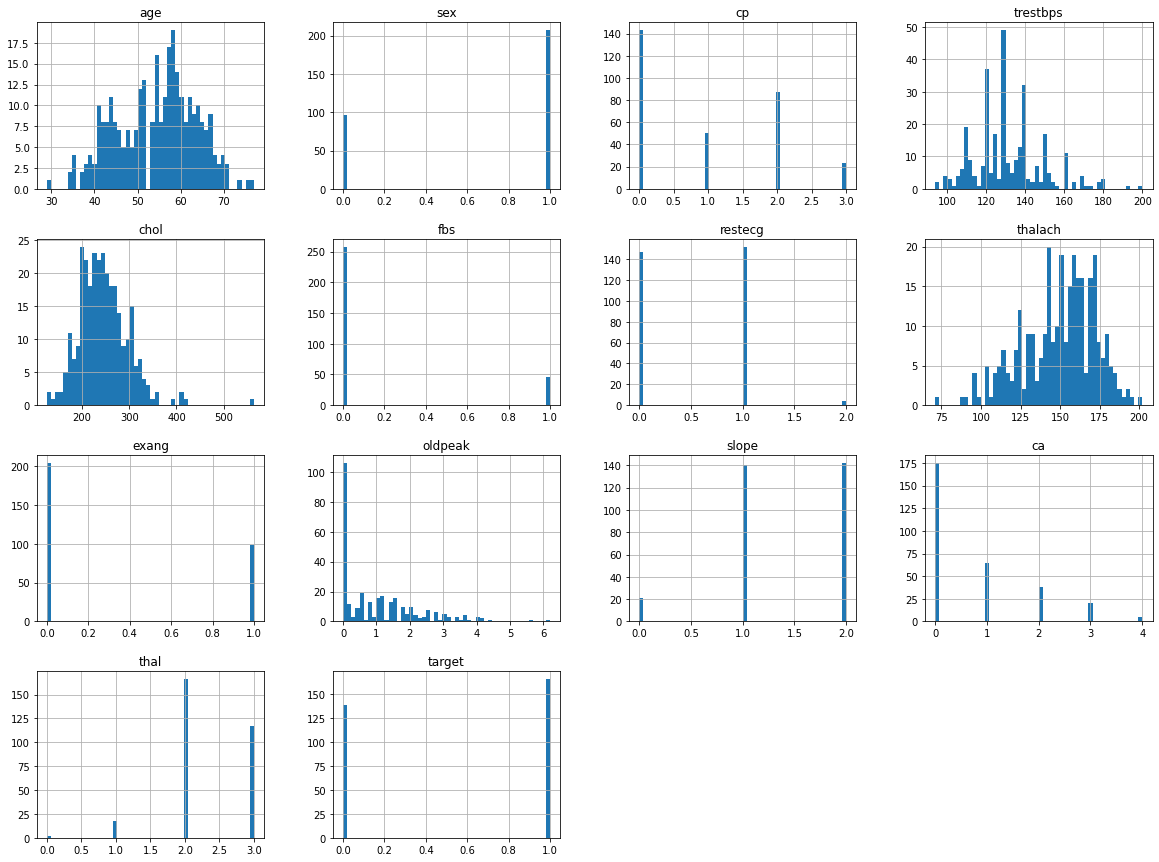

In [7]:
_ = df1.hist(bins=50, figsize=(20,15))
plt.savefig('figure1.pdf', dpi=1200)
# plt.savefig(fname, dpi=1200, format=pdf)
#plt.savefig(fname, dpi=1200, format=pdf)

# Step 3: Preprocessing & Creating Imbalance

We create versions/surrogates in addition to the original data by subsamspling one of the classes

The dataframe has a current imbalance of 54.5% with Class 0 having fewer values than Class 1. We can undersample Class 0 to create a 65% imbalance in the dataset.

In [8]:
df1['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
# code below adapted from [https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets]
# class count
count_class_0, count_class_1 = df1.target.value_counts()

# divide by class
df_class_0 = df1[df1['target'] == 0]
df_class_1 = df1[df1['target'] == 1]

df_class_0_under = df_class_0.sample(106)
df1_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [10]:
df1_under

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3,0
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [15]:
df1_under['target'].value_counts()

1    165
0    106
Name: target, dtype: int64

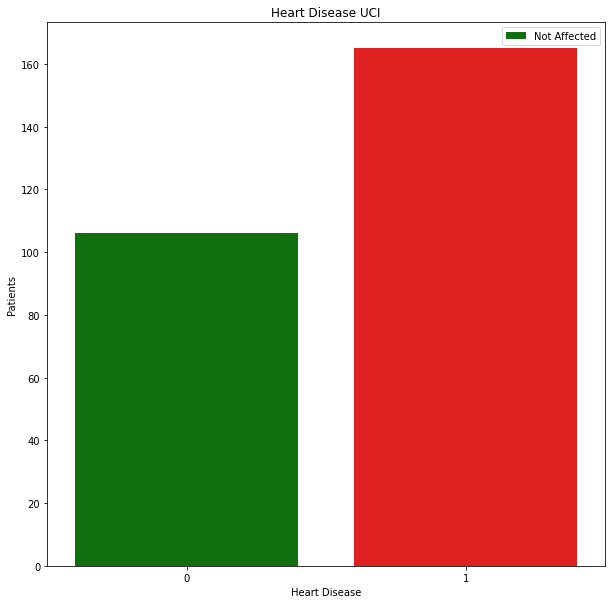

In [19]:
fig = plt.subplots(figsize=(10,10))
sns.countplot(x = df1_under['target'], palette=['Green','Red'])
plt.xlabel('Heart Disease')
plt.ylabel('Patients')
plt.legend(['Not Affected', 'Affected'])
plt.title('Heart Disease UCI')
plt.show()